# SBA LOAN APPROVAL DATASET 

### INTRODUCTION

The dataset is from the U.S Small Business Administration. To start with, we had 899164 rows of data and 27 feature columns. The main purpose of the project was to classify and predict if the loan should be approved or rejected based on the different feature values that we have in our data. Further, our goal was also to analyze how accurately different models can perform this classification.

Here is a snippet of the dataset :

In [2]:
# -*- coding: utf-8 -*-

"""

Created on Thu Dec  9 22:15:03 2021



@author: Group A (Jagriti, Renuka, Vallabh)

"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


#Loading the SBA loan data here
df_Loan = pd.read_csv('SBAnational.csv')

df_Loan.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df_Loan.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [104]:
df_Loan.shape

(899164, 27)

In [105]:
df_Loan.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

### Data Preparation and Analysis 

#### Data Cleaning
Before building the models, we have cleaned the dataset to prepare it for analysis. 
- To begin with, we have identified and eliminated the null values instead of imputing values as the dataset is very huge and calculating the values to be imputed is very difficult
- We have checked the datatypes of features and assigned them the appropriate data type.
- We have corrected inconsistent/incorrect data entries
- We have scaled the data as we are dealing with huge numbers

#### Data Analysis
We have created boxplots, bar charts and correlation matrix to describe the data and understand the features better.

In [4]:
df_Loan.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [5]:
df_Loan.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 
                       'DisbursementDate', 'MIS_Status'], inplace=True)

df_Loan.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Checking the datatypes for each feature

In [108]:
df_Loan.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [6]:
df_Loan[['ApprovalDate', 'DisbursementDate']] = df_Loan[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)


In [7]:
def edit_str(x):
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '')
    return x



df_Loan['DisbursementGross'] = df_Loan['DisbursementGross'].apply(edit_str)
df_Loan['BalanceGross'] = df_Loan['BalanceGross'].apply(edit_str)
df_Loan['ChgOffPrinGr'] = df_Loan['ChgOffPrinGr'].apply(edit_str)
df_Loan['GrAppv'] = df_Loan['GrAppv'].apply(edit_str)
df_Loan['SBA_Appv'] = df_Loan['SBA_Appv'].apply(edit_str)


df_Loan = df_Loan.astype({'DisbursementGross': 'float', 'BalanceGross': 'float','ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [111]:
df_Loan['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [8]:
def clean_year_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df_Loan['ApprovalFY'] = df_Loan['ApprovalFY'].apply(clean_year_str)

df_Loan = df_Loan.astype({'ApprovalFY': 'int64'})

In [113]:
df_Loan['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971], dtype=int64)

Checking the data types of each feature again after modification

In [114]:
df_Loan.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate                   object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

In [118]:

df_Loan.describe(include=['float'])

,NewExist,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,886240.000000,8.862400e+05,886240.000000,8.862400e+05,8.862400e+05,8.862400e+05
mean,1.279900,2.021419e+05,3.032943,1.359378e+04,1.934997e+05,1.499839e+05
std,0.451509,2.879380e+05,1452.639312,6.546616e+04,2.835053e+05,2.281694e+05
min,0.000000,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,1.000000,4.283700e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.212550e+04
75%,2.000000,2.400000e+05,0.000000,0.000000e+00,2.270000e+05,1.750000e+05
max,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06


Let us explore the numerical features of our dataset that represent the loan amounts using boxplot

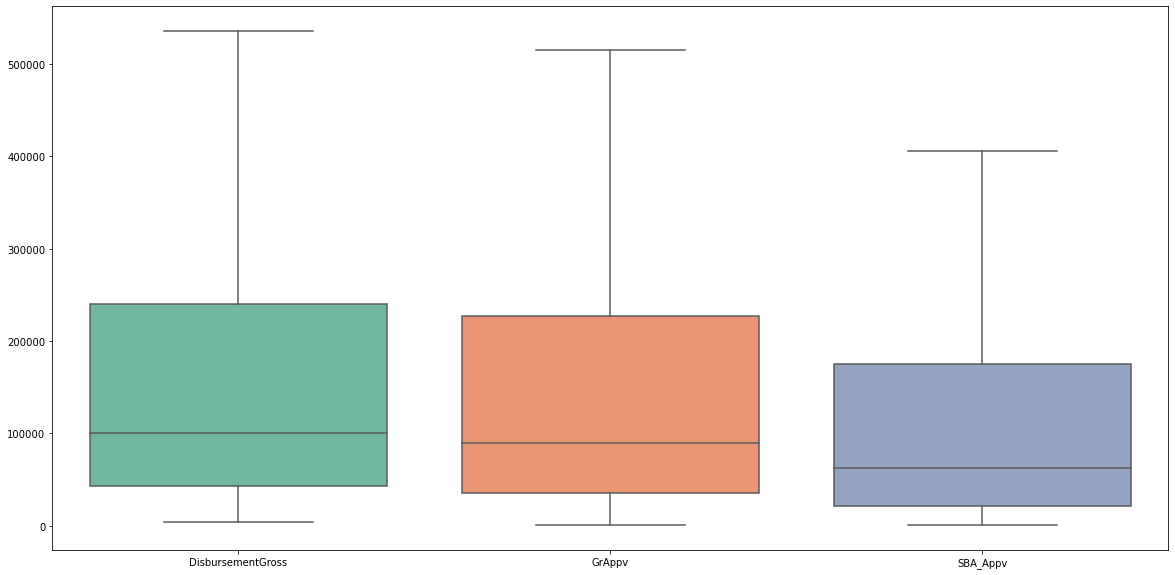

In [9]:
amount_data=['DisbursementGross', 'GrAppv', 'SBA_Appv']


sns.boxplot(data=df_Loan[amount_data], palette="Set2",showfliers=False)
fig=plt.gcf()
fig.set_size_inches(20,10)

Now, we will scale the numerical features in the dataset.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Scale the feature values prior to modeling

df_Loan[numerical_features]=MinMaxScaler().fit_transform(df_Loan[numerical_features])

NameError: name 'numerical_features' is not defined

In [121]:
df_Loan.describe(include=['float'])

,NewExist,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000
mean,1.279900,0.017317,0.000003,0.003870,0.038508,0.033222
std,0.451509,0.025164,0.001458,0.018638,0.056712,0.050710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.003394,0.000000,0.000000,0.006801,0.004612
50%,1.000000,0.008390,0.000000,0.000000,0.017804,0.013696
75%,2.000000,0.020625,0.000000,0.000000,0.045209,0.038782
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Engineering

Here we are creating traget variable based on the exisitng feature "MIS Status". In addition, we are also creating dummy variables for categorical features. 
We have also dropped unwanted features that add no value to the analysis.

In [11]:
# Build the target variable based on the MIS Status
# 0 = PIF(Paid in Full)
# 1 = CF(Charged Off)

df_Loan['Default'] = np.where(df_Loan['MIS_Status'] == 'P I F', 0, 1)

df_Loan.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,Y,NaN,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,Y,NaN,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,NaN,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,Y,NaN,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,NaN,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,0


In [12]:
#1 = Existing business, 2 = New business
df_Loan['NewExist'].unique()

array([2., 1., 0.])

In [13]:
#Revolving line of credit: Y = Yes, N = No
df_Loan['RevLineCr'].unique()


array(['N', '0', 'Y', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7', 'A',
       '5', '.', '4', '-', 'Q'], dtype=object)

In [14]:
df_Loan = df_Loan.query("RevLineCr in ['Y', 'N']")
df_Loan['RevLineCr'].unique()

array(['N', 'Y'], dtype=object)

In [15]:
#LowDoc Loan Program: Y = Yes, N = No
df_Loan['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [16]:
df_Loan = df_Loan.query("LowDoc in ['Y', 'N']")
df_Loan['LowDoc'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
#1 = Urban, 2 = rural, 0 = undefined
df_Loan['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

In [18]:
df_Loan['BankState'].unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'PA', 'MO', 'CA', 'UT', 'IL', 'KS', 'MI', 'WV', 'WI', 'CO',
       'ME', 'NH', 'AR', 'ND', 'MT', 'ID', 'KY', 'NM', 'WA', 'NV', 'DC',
       'NE', 'NJ', 'WY', 'AZ', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN', 'EN'],
      dtype=object)

Now we will remove PR GU AN EN VI which are the invalid states from the BankState variable

In [19]:

df_Loan = df_Loan.query("BankState in ['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',\
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',\
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',\
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', 'WY',\
       'NM', 'DC', 'NV', 'NE',  'HI', 'VT', 'AK']")
df_Loan['BankState'].unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'PA', 'MO', 'CA', 'UT', 'IL', 'KS', 'MI', 'WV', 'WI', 'CO',
       'ME', 'NH', 'AR', 'ND', 'MT', 'ID', 'KY', 'NM', 'WA', 'NV', 'DC',
       'NE', 'NJ', 'WY', 'AZ', 'HI', 'VT', 'AK'], dtype=object)

Dropping the unwanted columns that add no information to the analysis.

In [20]:

df_Loan.drop(columns=['LoanNr_ChkDgt','Name','City','State','Zip','Bank','MIS_Status'], inplace=True)

df_Loan.drop(columns=['ApprovalDate','DisbursementDate'], inplace=True)

df_Loan.drop(columns=['ChgOffDate'], inplace=True)

df_Loan.head()

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Default
0,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,60000.0,0.0,0.0,60000.0,48000.0,0
1,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,40000.0,0.0,0.0,40000.0,32000.0,0
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,287000.0,0.0,0.0,287000.0,215250.0,0
3,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,35000.0,0.0,0.0,35000.0,28000.0,0
4,FL,0,1997,240,14,1.0,7,7,1,0,N,N,229000.0,0.0,0.0,229000.0,229000.0,0


Final dataset dimensions are reduced to :

In [132]:
df_Loan.shape

(611031, 18)

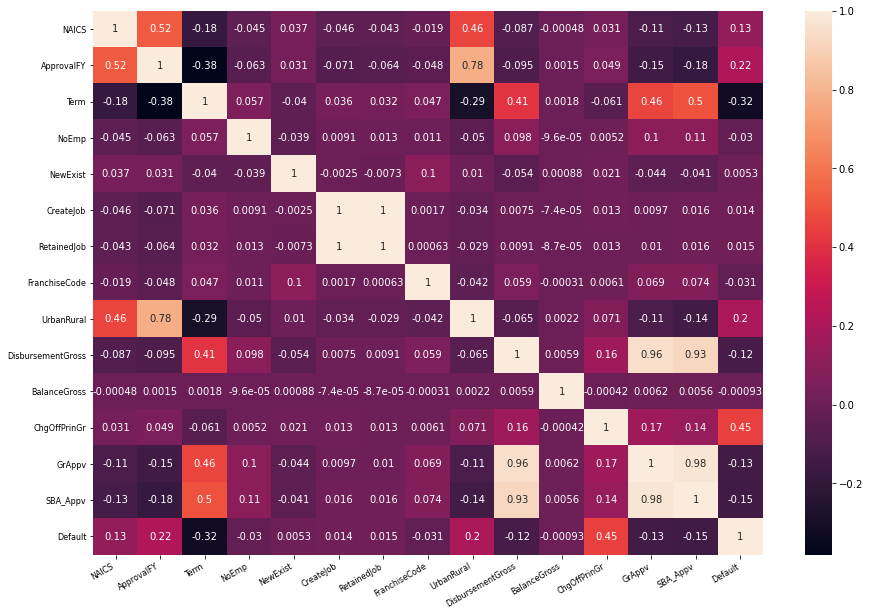

In [21]:
corr = df_Loan.corr()
corr
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = df_Loan.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [134]:
df_Loan.Default.unique()

array([0, 1])

In the plot below, we can see the state-wise distribution of loan that was charged off vs. loan that was paid in full. It can be seen that North Carolina, Illinois and California are the top states with high defaulter rate.

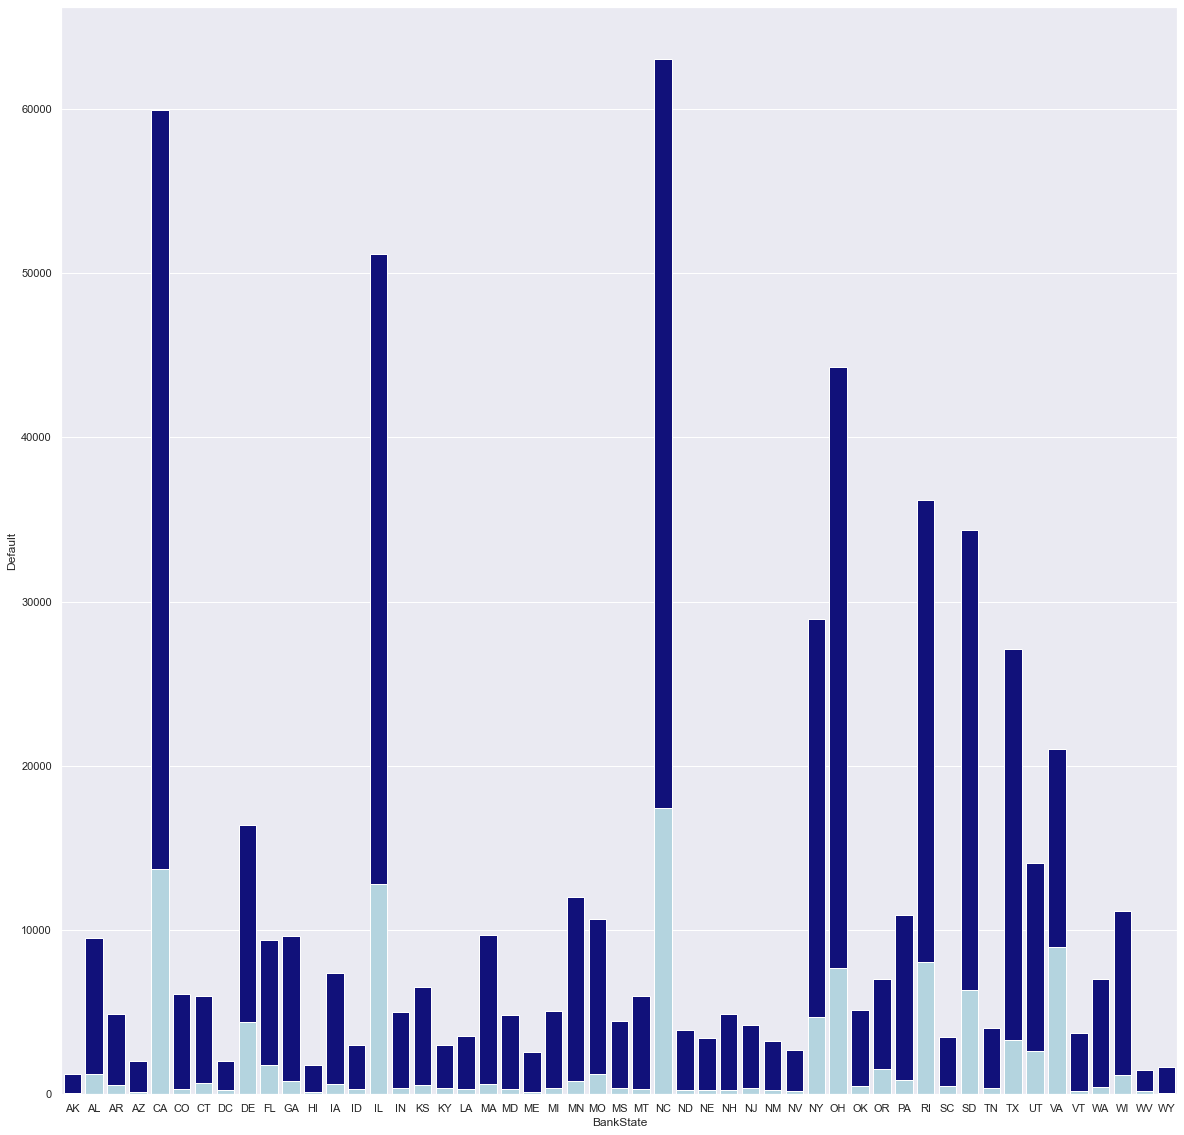

In [22]:
sns.set(style="darkgrid")
bar_data = df_Loan.groupby('BankState')['Default'].count().reset_index()
bar1 = sns.barplot(x="BankState",  y="Default", data=bar_data, color='darkblue')
defaulter=df_Loan[df_Loan.Default==1]
bar2_data=defaulter.groupby('BankState')['Default'].sum().reset_index()
bar2 = sns.barplot(x="BankState",  y="Default", data=bar2_data, color='lightblue')
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [136]:
data_check=df_Loan[(df_Loan.Default==1) & (df_Loan.BankState=='NC')]
data_check.Default.value_counts()

1    17452
Name: Default, dtype: int64

In [137]:
ca_data=df_Loan[df_Loan.BankState=='NC']
ca_data.shape

(63042, 18)

This is percentage distribution of loan defaulters for every state.

In [138]:
def_state = df_Loan.groupby(['BankState', 'Default'])['BankState'].count().unstack('Default')
def_state['Def_Percent'] = (def_state[1]/(def_state[1] + def_state[0]))*100
def_state

Default,0,1,Def_Percent
BankState,,,
AK,1123,96,7.875308
AL,8296,1247,13.067170
AR,4345,545,11.145194
AZ,1878,144,7.121662
CA,46222,13723,22.892652
CO,5791,342,5.576390
CT,5316,660,11.044177
DC,1802,234,11.493124
DE,11990,4419,26.930343


In [23]:
# One-hot encoding for the categorical data
df_Loan = pd.get_dummies(df_Loan)
df_Loan.head()

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,...,BankState_VA,BankState_VT,BankState_WA,BankState_WI,BankState_WV,BankState_WY,RevLineCr_N,RevLineCr_Y,LowDoc_N,LowDoc_Y
0,451120,1997,84,4,2.0,0,0,1,0,60000.0,...,0,0,0,0,0,0,1,0,0,1
1,722410,1997,60,2,2.0,0,0,1,0,40000.0,...,0,0,0,0,0,0,1,0,0,1
2,621210,1997,180,7,1.0,0,0,1,0,287000.0,...,0,0,0,0,0,0,1,0,1,0
3,0,1997,60,2,1.0,0,0,1,0,35000.0,...,0,0,0,0,0,0,1,0,0,1
4,0,1997,240,14,1.0,7,7,1,0,229000.0,...,0,0,0,0,0,0,1,0,1,0


### MODEL-BUILDING

We start by splitting the data into train and test datasets to fit into models. 

In [24]:
y = df_Loan['Default']
X = df_Loan.drop('Default', axis=1)
X = X[0:30000]
y = y[0:30000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

y_test.value_counts()

0    5823
1    1677
Name: Default, dtype: int64

#### Naive-Bayes Model
The most basic binary classifier model is Bernoulli's Naive-Bayes classifier model. We will use this as the baseline for our analysis and comparison of models. 


Number of mislabeled points out of a total 7500 points : 118
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5823
           1       0.96      0.97      0.96      1677

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500

The confusion matrix:
 [[5763   60]
 [  58 1619]]


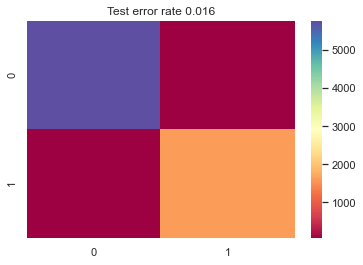

Error rate: 0.016
[0.986      0.98155556 0.98533333 0.98355556 0.98311111]
The average performance for 5 folds:  0.9839: 


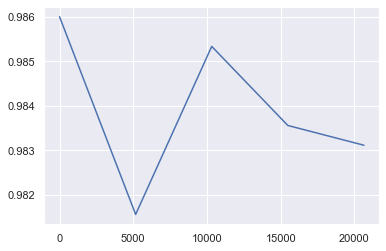

In [25]:

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import BernoulliNB

import sklearn.naive_bayes as skb

bnb=skb.BernoulliNB() #This is the binary Naive Bayes, assumes 0's and 1's
BernoulliModel=bnb.fit(X_train, y_train)
y_pred=BernoulliModel.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % 
(X_test.shape[0], (y_test != y_pred).sum()))
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("The confusion matrix:\n", C)
errRate=1.-sum(np.diag(C))/C.sum()
sns.heatmap(C, cmap="Spectral")
plt.title(f"Test error rate {errRate:3.2}")
plt.show()
print(f"Error rate: {errRate:3.2}")
nfolds=5
cv_scores2 = cross_val_score(BernoulliModel, X_train, y_train, cv=nfolds)
plt.plot(np.linspace(0,20639,nfolds),cv_scores2)
print(cv_scores2)
print("The average performance for %d folds:  %4.4f: "%(nfolds, np.sum(cv_scores2)/nfolds))

#### Comments on Naive Bayes Model
We can see a pretty high accuracy of 98% for this model. It is performing very well for a basic classification model.

#### KNN Model

The next model uses kNN algorithm to classify the loan dataset. In this model, we are finding the best k and plugging in that k value in our classifier to predict the loan status.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


#KNN finding best K and cross val score 
#cross val score

N=20

print("Cross Val Score for k=1 to ",N)
for i in range(0,N,1):
    knn_cv = KNeighborsClassifier(i+1)
    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
    print("For k= ",i+1, " score(Accuracy)= ",cv_scores)



#knn k=1 to 201 jumping every 10 steps

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, N, 1)}
knn_gscv = GridSearchCV(knn, param_grid, return_train_score=True, cv=5)
knn_gscv.fit(X_train, y_train)



#print all the accuracy for each knn

results = knn_gscv.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(params,"Accuracy= ", np.sqrt(mean_score))

In [27]:
print("Best KNN is ",knn_gscv.best_params_)
plt.scatter(np.arange(1, N, 1),knn_gscv.cv_results_['mean_test_score'],s=5)
plt.title("Accuracy vs k")
plt.show()

print(f"knn best score occurred for k={list(knn_gscv.best_params_.values())[0]}, the best score was {knn_gscv.best_score_:3.2}")



#use the knn model with best result

print("  ")
print("Predicting the model with k=", list(knn_gscv.best_params_.values())[0])
print("  ")
knnClassifier= KNeighborsClassifier(list(knn_gscv.best_params_.values())[0]) 
knnClassifier.fit(X_train,y_train)
y_pred=knnClassifier.predict(X_test)



print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

print("The confusion matrix:\n", C)
sns.heatmap(C, cmap="Spectral")
errRate=1.-sum(np.diag(C))/C.sum()
print(f"Error rate: {errRate:5.3}")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### Comments on KNN
We found that the best k value is 5 giving an accuracy of 88%. Out of a total of 7500 test datapoints, 907 were mislabelled and the error rate was found to be 0.121
This model seems like a downgrade as it did not perform well when compared to the benchmark set by Naive-Bayes.

#### Random Forest
We move on to Random Forest model, and calculate the out of bag score and perform cross validation. 

Confusion matrix:
[[5756   64]
 [   1 1679]]
Test accuracy: 0.99133
out-of-bag accuracy: 0.99089
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5820
           1       0.96      1.00      0.98      1680

    accuracy                           0.99      7500
   macro avg       0.98      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



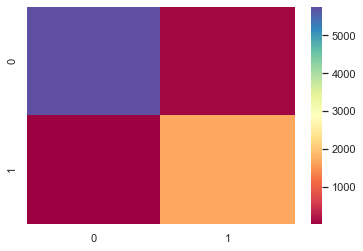

[0.99266667 0.99133333 0.98822222 0.99044444 0.99088889]
The average performance for 5 folds:  0.9907 


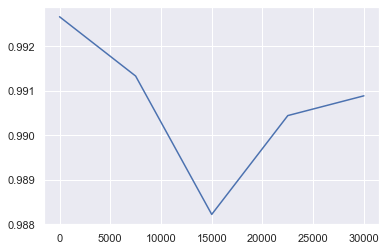

In [162]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,min_samples_leaf=16,n_jobs=-1,oob_score=True)
rfModel=rf.fit(X_train, y_train)

y_pred_rf=rfModel.predict(X_test)
predProb_rf=rfModel.predict_proba(X_test)
cm_rf=confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:")
print(cm_rf)
print(f"Test accuracy: {np.sum(np.diag(cm_rf))/np.sum(cm_rf):3.5}")

print(f"out-of-bag accuracy: {rfModel.oob_score_:3.5}")

print(classification_report(y_test, y_pred_rf))
sns.heatmap(cm_rf, cmap="Spectral")
plt.show()

nfolds=5
cv_scores2 = cross_val_score(rfModel, X_train, y_train, cv=nfolds)
plt.plot(np.linspace(0,30000,nfolds),cv_scores2)
print(cv_scores2)
print("The average performance for %d folds:  %4.4f "%(nfolds, np.sum(cv_scores2)/nfolds))

#### Comments on Random Forest
As we can see, accuracy of Random Forest model surpassed the benchmark set by Naive-Bayes. Also, it has a very high out-of-bag score that validates the model, we can consider this as the best model till now.

#### Logistic Regression
Since we are doing a binary classification, we can use logistic regression as one of our models. 

Number of mislabeled points out of a total 7500 points : 138
Confusion matrix:
[[5778   45]
 [  93 1584]]


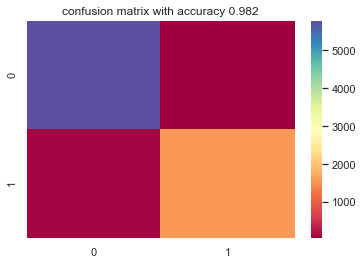

Report for regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5823
           1       0.97      0.94      0.96      1677

    accuracy                           0.98      7500
   macro avg       0.98      0.97      0.97      7500
weighted avg       0.98      0.98      0.98      7500

Error rate : 0.0184


In [29]:
#Logistic Regression

log_rig=LogisticRegression(max_iter=1000)
log_rig.fit(X_train,y_train)
y_pred=log_rig.predict(X_test)



print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}")
C=confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(C)

sns.heatmap(C, cmap="Spectral",annot=False)
plt.title(f"confusion matrix with accuracy {sum(np.diag(C))/C.sum():5.3}")
plt.show()

print("Report for regression:")
print(classification_report(y_test,y_pred))
print(f"Error rate : {(1.-sum(np.diag(C))/C.sum()):5.3}")






#### Comments on Logistic Regression
We can see the accuracy of 84.5% and misclassification of 1159 data points out of a total 7500 test data points. 
Error rate comes out to be 0.155

#### Logistic Regression Using Regularisation
We tried to use regularisation to reduce the error and avoid overfitting but this has taken a toll on accuracy and it has gone down to 77.6%.
Thus, we continue to look for better model.

Number of mislabeled points out of a total 7500 points : 265
Confusion matrix:
[[5800   23]
 [ 242 1435]]


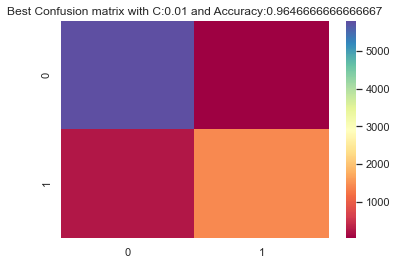

Report for regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5823
           1       0.98      0.86      0.92      1677

    accuracy                           0.96      7500
   macro avg       0.97      0.93      0.95      7500
weighted avg       0.97      0.96      0.96      7500

Error rate : 0.0353


In [32]:
##Logistic Regression with L1 regularisation SAGA solver
best_accuracy = 0
for c in [0.01,0.1,1,10]:
    logr = LogisticRegression(penalty='l1', C=c, solver='saga')
    logr.fit(X_train, y_train)
    Y_pred = logr.predict(X_test)
    Y_pred_prob = logr.predict_proba(X_test)
    
    Conf = confusion_matrix(y_test, Y_pred)
    accuracy = accuracy_score(y_test, Y_pred)
        
    if (accuracy > best_accuracy):
        best_accuracy = accuracy 
        best_c = c
        best_conf = Conf

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != Y_pred).sum()}")
C=confusion_matrix(y_test, Y_pred)

print("Confusion matrix:")
print(C)

sns.heatmap(best_conf, cmap='Spectral')
plt.title(f"Best Confusion matrix with C:{best_c} and Accuracy:{best_accuracy}")
plt.show()

print("Report for regression:")
print(classification_report(y_test,Y_pred))
print(f"Error rate : {(1.-sum(np.diag(C))/C.sum()):5.3}")
        




Number of mislabeled points out of a total 7500 points : 226
Confusion matrix:
[[5794   29]
 [ 197 1480]]


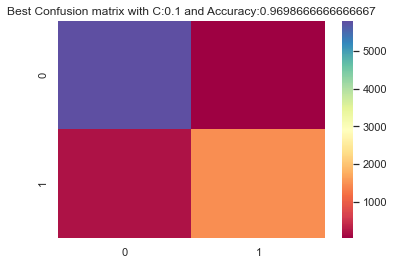

Report for regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5823
           1       0.98      0.88      0.93      1677

    accuracy                           0.97      7500
   macro avg       0.97      0.94      0.95      7500
weighted avg       0.97      0.97      0.97      7500

Error rate : 0.0301


In [33]:
##Logistic Regression with L2 regularisation SAG solver
best_accuracy = 0
for c in [0.01,0.1,1,10]:
    logr = LogisticRegression(penalty='l2', C=c, solver='sag')
    logr.fit(X_train, y_train)
    Y_pred = logr.predict(X_test)
    Y_pred_prob = logr.predict_proba(X_test)
    
    Conf = confusion_matrix(y_test, Y_pred)
    accuracy = accuracy_score(y_test, Y_pred)
        
    if (accuracy > best_accuracy):
        best_accuracy = accuracy 
        best_c = c
        best_conf = Conf
        
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != Y_pred).sum()}")
C=confusion_matrix(y_test, Y_pred)
print("Confusion matrix:")
print(C)

sns.heatmap(best_conf, cmap='Spectral')
plt.title(f"Best Confusion matrix with C:{best_c} and Accuracy:{best_accuracy}")
plt.show()

print("Report for regression:")
print(classification_report(y_test,Y_pred))
print(f"Error rate : {(1.-sum(np.diag(C))/C.sum()):5.3}")




#### SUPPORT VECTOR MACHINES

Next, we will fit the data in SVM classifier model and see how it performs. Starting with Radial Basis Function :

Number of mislabeled points out of a total 7500 points : 344
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5823
           1       0.99      0.81      0.89      1677

    accuracy                           0.95      7500
   macro avg       0.97      0.90      0.93      7500
weighted avg       0.96      0.95      0.95      7500

The confusion matrix:
 [[5805   18]
 [ 326 1351]]
Error rate: 0.0459


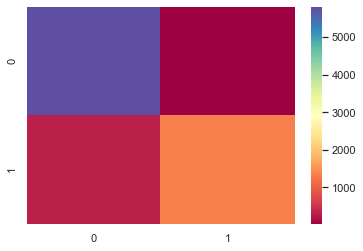

In [34]:
#SVM using Radial kernel
from sklearn.svm import SVC
svmClf=SVC(kernel="rbf",probability=True)
svmClf.fit(X_train, y_train)
y_pred=svmClf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("The confusion matrix:\n", C)
print(f"Error rate: {(1.-sum(np.diag(C))/C.sum()):5.3}")

sns.heatmap(C, cmap="Spectral")
plt.show()

#### Comments on SVM with RBF
It looks like although the SVM (RBF) model shows an accuracy of 78% it is misclassifying all of the data where Default should have been predicted as 1 (i.e where the business failed to repay the loan). This does not work in favour of what we are trying to predict here.

#### SVM with Poylnomial Degree=3
Next we will try polynomial kernel function for Logistic Regression to see how it performs.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.svm import SVC
svmClf=SVC(kernel="poly",degree=3,probability=True)
svmClf.fit(X_train, y_train)
y_pred=svmClf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5810
           1       0.98      0.71      0.83      1690

    accuracy                           0.93      7500
   macro avg       0.95      0.86      0.89      7500
weighted avg       0.94      0.93      0.93      7500

The confusion matrix:
 [[5790   20]
 [ 484 1206]]


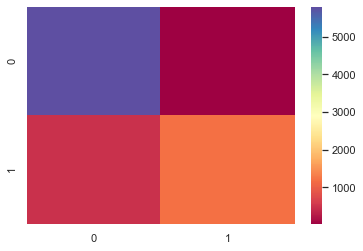

Error rate: 0.0672


In [38]:
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("The confusion matrix:\n", C)
sns.heatmap(C, cmap="Spectral")
plt.show()

print(f"Error rate: {(1.-sum(np.diag(C))/C.sum()):5.3}")



#### Comments on SVM Polynomial
As seen in SVM with RBF kernel, the polynomial kernel also fails to identify the Defaulters in the dataset and has an error rate of 22.4% 
Looks like SVM is not the best classifier function for this dataset.


#### Neural Net with Three Layers
Implementing neural net with three hidden layers first :

Number of mislabeled points out of a total 7500 points : 111
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5810
           1       0.97      0.97      0.97      1690

    accuracy                           0.99      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.99      0.99      0.99      7500

The confusion matrix:
 [[5758   52]
 [  59 1631]]


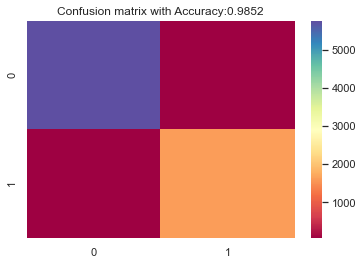

Error rate: 0.0148


In [39]:
from sklearn.neural_network import MLPClassifier
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nn3 = MLPClassifier(hidden_layer_sizes=(128,128,64))
nn3.fit(X_train, y_train)
Y_pred = nn3.predict(X_test)
Y_pred_prob = nn3.predict_proba(X_test)
    

accuracy = accuracy_score(y_test, Y_pred)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != Y_pred).sum()))

C=confusion_matrix(y_test, Y_pred)
print(classification_report(y_test,Y_pred))
print("The confusion matrix:\n", C)
sns.heatmap(C, cmap='Spectral')
plt.title(f"Confusion matrix with Accuracy:{accuracy}")
plt.show()

print(f"Error rate: {(1.-sum(np.diag(C))/C.sum()):5.3}")



#### Comments on Neural Net with 3 layers
We can see that this model has given us an accuracy of 84% which is not the best but is much better than SVMs and equivalent to that of Logistic Regression (without Regularisation).

#### Neural Net with Four Layers
Checking if including more hidden layers would improve the accuracy of neural network

Number of mislabeled points out of a total 7500 points : 1013
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5810
           1       0.99      0.41      0.58      1690

    accuracy                           0.86      7500
   macro avg       0.92      0.70      0.75      7500
weighted avg       0.88      0.86      0.84      7500

The confusion matrix:
 [[5801    9]
 [1004  686]]


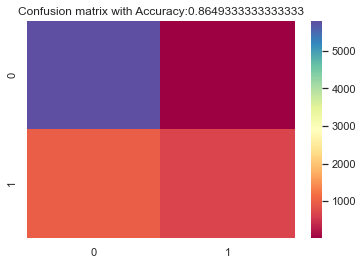

Error rate: 0.135


In [40]:
nn4 = MLPClassifier(hidden_layer_sizes=(128,128,64,32))
nn4.fit(X_train, y_train)
Y_pred = nn4.predict(X_test)
Y_pred_prob = nn4.predict_proba(X_test)
    
accuracy = accuracy_score(y_test, Y_pred)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != Y_pred).sum()))

C=confusion_matrix(y_test, Y_pred)
print(classification_report(y_test,Y_pred))
print("The confusion matrix:\n", C)
sns.heatmap(C, cmap='Spectral')
plt.title(f"Confusion matrix with Accuracy:{accuracy}")
plt.show()

print(f"Error rate: {(1.-sum(np.diag(C))/C.sum()):5.3}")



#### Comments on Neural Net with Four Layers
Looks like neural net with 3 layers is performing much better than neural net with 4 layers. Accuracy has gone down to 78% so looks like adding extra layers is not doing anything to improve the model.


### CONCLUSION
The below plot compares the accuracies of all the models and displays the result. 
As we can see from the plot, the Random Forest model has the best accuracy followed by Naive-Bayes, KNN, and Logistic Regression/Neural Nets. 

Text(0.5, 1.0, 'Scatter plot of accuracy of models on SBA Loan Dataset')

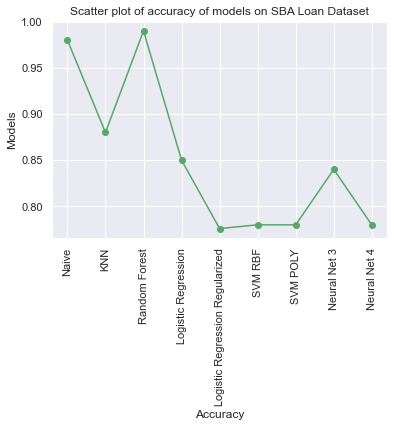

In [161]:
accuracy = np.array([0.98,0.88,0.99,0.85,0.776,0.78,0.78,0.84,0.78])
Model = np.array(["Naive", "KNN", "Random Forest", "Logistic Regression", "Logistic Regression Regularized","SVM RBF","SVM POLY","Neural Net 3","Neural Net 4"])
plt.plot(Model,accuracy,'o-g')
plt.xticks(rotation=90)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Scatter plot of accuracy of models on SBA Loan Dataset')